In [1]:
from pyts.multivariate.image import JointRecurrencePlot
import json
from collections import Counter
import numpy as np
import pandas as pd
import operator
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from matplotlib.patches import Ellipse
import seaborn as sns
import pandas as pd
import networkx as nx
import base64
from collections import defaultdict
import sys,os
import math
import random
import operator
import csv
import matplotlib.pylab as pyl
import itertools
import scipy as sp
from scipy import stats
from scipy import optimize
from scipy.integrate import quad
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_json("data/events/events_Italy.json")
df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],8327,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",2575959,Pass,3158,1H,2.530536,85,180423957
1,8,Simple pass,[{'id': 1801}],20438,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",2575959,Pass,3158,1H,3.768418,85,180423958
2,7,Touch,[],8306,"[{'y': 17, 'x': 36}, {'y': 56, 'x': 78}]",2575959,Others on the ball,3158,1H,4.868265,72,180423959
3,1,Ground attacking duel,"[{'id': 504}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 56, 'x': 78}, {'y': 15, 'x': 64}]",2575959,Duel,3158,1H,8.114676,11,180423960
4,1,Ground attacking duel,"[{'id': 503}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 15, 'x': 64}, {'y': 15, 'x': 72}]",2575959,Duel,3158,1H,8.647892,11,180423961


In [3]:
te = pd.read_json("data/teams.json")
te.head()

,city,name,wyId,officialName,area,type
0,Newcastle upon Tyne,Newcastle United,1613,Newcastle United FC,"{'name': 'England', 'id': '0', 'alpha3code': '...",club
1,Vigo,Celta de Vigo,692,Real Club Celta de Vigo,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
2,Barcelona,Espanyol,691,Reial Club Deportiu Espanyol,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
3,Vitoria-Gasteiz,Deportivo Alav\u00e9s,696,Deportivo Alav\u00e9s,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club
4,Valencia,Levante,695,Levante UD,"{'name': 'Spain', 'id': '724', 'alpha3code': '...",club


In [4]:
count = 0
for index,j in te.iterrows():
    lst=j['area']
    for i in range(len(lst)):
        if lst['id'] == '380' :
            count = count+1
            print(count,lst,j['name'])        

1 {'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'} SPAL
2 {'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'} SPAL
3 {'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'} SPAL
4 {'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'} SPAL
5 {'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'} Milan
6 {'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'} Milan
7 {'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'} Milan
8 {'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'} Milan
9 {'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'} Juventus
10 {'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'} Juventus
11 {'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'} Juventus
12 {'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'} Juventus
13 {'name': 'Italy', 'id': '3

In [5]:
tei = te.loc[te['area']=={'name': 'Italy', 'id': '380', 'alpha3code': 'ITA', 'alpha2code': 'IT'}]
tei.head(30)

,city,name,wyId,officialName,area,type
18,Ferrara,SPAL,3204,Societ\u00e0 Polisportiva Ars et Labor 2013,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
34,Milano,Milan,3157,AC Milan,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
36,Torino,Juventus,3159,Juventus FC,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
37,Roma,Roma,3158,AS Roma,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
38,Sassuolo,Sassuolo,3315,US Sassuolo Calcio,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
47,Bologna,Bologna,3166,Bologna FC 1909,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
49,Genova,Sampdoria,3164,UC Sampdoria,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
50,Verona,Chievo,3165,AC Chievo Verona,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
51,Formello,Lazio,3162,SS Lazio,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
52,Udine,Udinese,3163,Udinese Calcio,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club


In [6]:
ju = tei.loc[tei['wyId']==3159]
ju.head()

,city,name,wyId,officialName,area,type
36,Torino,Juventus,3159,Juventus FC,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club


In [7]:
ma = pd.read_json("data/matches/matches_Italy.json")
ma.head(55)

,status,roundId,gameweek,teamsData,seasonId,dateutc,winner,venue,wyId,label,date,referees,duration,competitionId
0,Played,4406278,38,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",181248,2018-05-20 18:45:00,3161,,2576335,"Lazio - Internazionale, 2 - 3","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377206, 'role': 'referee'}, {'r...",Regular,524
1,Played,4406278,38,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",181248,2018-05-20 18:45:00,3158,MAPEI Stadium - Citt\u00e0 del Tricolore,2576336,"Sassuolo - Roma, 0 - 1","May 20, 2018 at 8:45:00 PM GMT+2","[{'refereeId': 377255, 'role': 'referee'}, {'r...",Regular,524
2,Played,4406278,38,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",181248,2018-05-20 16:00:00,3173,,2576329,"Cagliari - Atalanta, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377247, 'role': 'referee'}, {'r...",Regular,524
3,Played,4406278,38,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",181248,2018-05-20 16:00:00,3165,,2576330,"Chievo - Benevento, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377246, 'role': 'referee'}, {'r...",Regular,524
4,Played,4406278,38,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",181248,2018-05-20 16:00:00,3163,,2576331,"Udinese - Bologna, 1 - 0","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377254, 'role': 'referee'}, {'r...",Regular,524
5,Played,4406278,38,"{'3197': {'scoreET': 0, 'coachId': 287082, 'si...",181248,2018-05-20 16:00:00,3187,,2576332,"Napoli - Crotone, 2 - 1","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377231, 'role': 'referee'}, {'r...",Regular,524
6,Played,4406278,38,"{'3157': {'scoreET': 0, 'coachId': 20407, 'sid...",181248,2018-05-20 16:00:00,3157,,2576333,"Milan - Fiorentina, 5 - 1","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377252, 'role': 'referee'}, {'r...",Regular,524
7,Played,4406278,38,"{'3164': {'scoreET': 0, 'coachId': 210121, 'si...",181248,2018-05-20 16:00:00,3204,,2576337,"SPAL - Sampdoria, 3 - 1","May 20, 2018 at 6:00:00 PM GMT+2","[{'refereeId': 377256, 'role': 'referee'}, {'r...",Regular,524
8,Played,4406278,38,"{'3185': {'scoreET': 0, 'coachId': 21155, 'sid...",181248,2018-05-20 13:00:00,3185,,2576338,"Genoa - Torino, 1 - 2","May 20, 2018 at 3:00:00 PM GMT+2","[{'refereeId': 393614, 'role': 'referee'}, {'r...",Regular,524
9,Played,4406278,38,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",181248,2018-05-19 13:00:00,3159,,2576334,"Juventus - Hellas Verona, 2 - 1","May 19, 2018 at 3:00:00 PM GMT+2","[{'refereeId': 377237, 'role': 'referee'}, {'r...",Regular,524


In [8]:
jum = ma.loc[ma['winner']==3159]
jum.reset_index(inplace=True)
jum = jum.drop(columns=['index','status','gameweek','roundId','seasonId','venue','duration','competitionId','date','referees','dateutc'])
jum.head(30)

,teamsData,winner,wyId,label
0,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576334,"Juventus - Hellas Verona, 2 - 1"
1,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",3159,2576311,"Juventus - Bologna, 3 - 1"
2,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576302,"Internazionale - Juventus, 2 - 3"
3,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576275,"Juventus - Sampdoria, 3 - 0"
4,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576266,"Benevento - Juventus, 2 - 4"
5,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576252,"Juventus - Milan, 3 - 1"
6,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576209,"Juventus - Atalanta, 2 - 0"
7,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576238,"Juventus - Udinese, 2 - 0"
8,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576225,"Lazio - Juventus, 0 - 1"
9,"{'3185': {'scoreET': 0, 'coachId': 21155, 'sid...",3159,2576204,"Torino - Juventus, 0 - 1"


In [9]:
jul = ma
jul = jul.drop(columns=['status','gameweek','roundId','seasonId','venue','duration','competitionId','date','referees','dateutc'])
jul.head()

,teamsData,winner,wyId,label
0,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",3161,2576335,"Lazio - Internazionale, 2 - 3"
1,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",3158,2576336,"Sassuolo - Roma, 0 - 1"
2,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",3173,2576329,"Cagliari - Atalanta, 1 - 0"
3,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",3165,2576330,"Chievo - Benevento, 1 - 0"
4,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",3163,2576331,"Udinese - Bologna, 1 - 0"


In [10]:
for index,j in jul.iterrows():
    lst=j['teamsData']
    dic = lst.keys()
    for i in dic:
        if i!=str(j['winner']):
            jul.at[index,'loss'] = i

In [11]:
jul.head()

,teamsData,winner,wyId,label,loss
0,"{'3162': {'scoreET': 0, 'coachId': 251025, 'si...",3161,2576335,"Lazio - Internazionale, 2 - 3",3162
1,"{'3158': {'scoreET': 0, 'coachId': 210119, 'si...",3158,2576336,"Sassuolo - Roma, 0 - 1",3315
2,"{'3173': {'scoreET': 0, 'coachId': 251044, 'si...",3173,2576329,"Cagliari - Atalanta, 1 - 0",3172
3,"{'3165': {'scoreET': 0, 'coachId': 272970, 'si...",3165,2576330,"Chievo - Benevento, 1 - 0",3219
4,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",3163,2576331,"Udinese - Bologna, 1 - 0",3166


In [12]:
juloss = jul.loc[jul['loss']=='3159']
juloss.head(30)

,teamsData,winner,wyId,label,loss
41,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3187,2576295,"Juventus - Napoli, 0 - 1",3159
53,"{'3197': {'scoreET': 0, 'coachId': 287082, 'si...",0,2576284,"Crotone - Juventus, 1 - 1",3159
255,"{'3164': {'scoreET': 0, 'coachId': 210121, 'si...",3164,2576085,"Sampdoria - Juventus, 3 - 2",3159
310,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3162,2576035,"Juventus - Lazio, 1 - 2",3159


In [13]:
exju = jum
exju.head(30)

,teamsData,winner,wyId,label
0,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576334,"Juventus - Hellas Verona, 2 - 1"
1,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",3159,2576311,"Juventus - Bologna, 3 - 1"
2,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576302,"Internazionale - Juventus, 2 - 3"
3,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576275,"Juventus - Sampdoria, 3 - 0"
4,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576266,"Benevento - Juventus, 2 - 4"
5,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576252,"Juventus - Milan, 3 - 1"
6,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576209,"Juventus - Atalanta, 2 - 0"
7,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576238,"Juventus - Udinese, 2 - 0"
8,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576225,"Lazio - Juventus, 0 - 1"
9,"{'3185': {'scoreET': 0, 'coachId': 21155, 'sid...",3159,2576204,"Torino - Juventus, 0 - 1"


In [14]:
for index,j in jum.iterrows():
    lst=j['teamsData']
    print(lst)

{'3159': {'scoreET': 0, 'coachId': 20386, 'side': 'home', 'teamId': 3159, 'score': 2, 'scoreP': 0, 'hasFormation': 1, 'formation': {'bench': [{'playerId': 20461, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 20579, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 25437, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 3318, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 20588, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 20395, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 7849, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 20751, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 14855, 'ownGoals': '0', 'redCards': '0', 'goals': 'null', 'yellowCards': '0'}, {'playerId': 21128, 'ownGoals': 

In [15]:
for index,j in exju.iterrows():
    lst=j['teamsData']
    dic = lst.keys()
    for i in dic:
        if i!='3159' and i!=j['winner']:
            exju.at[index,'loss'] = i
            


In [16]:
jum.head(31)

,teamsData,winner,wyId,label,loss
0,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576334,"Juventus - Hellas Verona, 2 - 1",3194
1,"{'3166': {'scoreET': 0, 'coachId': 20481, 'sid...",3159,2576311,"Juventus - Bologna, 3 - 1",3166
2,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576302,"Internazionale - Juventus, 2 - 3",3161
3,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576275,"Juventus - Sampdoria, 3 - 0",3164
4,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576266,"Benevento - Juventus, 2 - 4",3219
5,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576252,"Juventus - Milan, 3 - 1",3157
6,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576209,"Juventus - Atalanta, 2 - 0",3172
7,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576238,"Juventus - Udinese, 2 - 0",3163
8,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3159,2576225,"Lazio - Juventus, 0 - 1",3162
9,"{'3185': {'scoreET': 0, 'coachId': 21155, 'sid...",3159,2576204,"Torino - Juventus, 0 - 1",3185


In [17]:
juloss = juloss[juloss['winner']!=0]

In [18]:
juloss.head(30)

,teamsData,winner,wyId,label,loss
41,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3187,2576295,"Juventus - Napoli, 0 - 1",3159
255,"{'3164': {'scoreET': 0, 'coachId': 210121, 'si...",3164,2576085,"Sampdoria - Juventus, 3 - 2",3159
310,"{'3159': {'scoreET': 0, 'coachId': 20386, 'sid...",3162,2576035,"Juventus - Lazio, 1 - 2",3159


In [19]:
tei.head(30)

,city,name,wyId,officialName,area,type
18,Ferrara,SPAL,3204,Societ\u00e0 Polisportiva Ars et Labor 2013,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
34,Milano,Milan,3157,AC Milan,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
36,Torino,Juventus,3159,Juventus FC,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
37,Roma,Roma,3158,AS Roma,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
38,Sassuolo,Sassuolo,3315,US Sassuolo Calcio,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
47,Bologna,Bologna,3166,Bologna FC 1909,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
49,Genova,Sampdoria,3164,UC Sampdoria,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
50,Verona,Chievo,3165,AC Chievo Verona,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
51,Formello,Lazio,3162,SS Lazio,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club
52,Udine,Udinese,3163,Udinese Calcio,"{'name': 'Italy', 'id': '380', 'alpha3code': '...",club


In [20]:
df.head()

,eventId,subEventName,tags,playerId,positions,matchId,eventName,teamId,matchPeriod,eventSec,subEventId,id
0,8,Simple pass,[{'id': 1801}],8327,"[{'y': 52, 'x': 49}, {'y': 44, 'x': 43}]",2575959,Pass,3158,1H,2.530536,85,180423957
1,8,Simple pass,[{'id': 1801}],20438,"[{'y': 44, 'x': 43}, {'y': 17, 'x': 36}]",2575959,Pass,3158,1H,3.768418,85,180423958
2,7,Touch,[],8306,"[{'y': 17, 'x': 36}, {'y': 56, 'x': 78}]",2575959,Others on the ball,3158,1H,4.868265,72,180423959
3,1,Ground attacking duel,"[{'id': 504}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 56, 'x': 78}, {'y': 15, 'x': 64}]",2575959,Duel,3158,1H,8.114676,11,180423960
4,1,Ground attacking duel,"[{'id': 503}, {'id': 703}, {'id': 1801}]",8306,"[{'y': 15, 'x': 64}, {'y': 15, 'x': 72}]",2575959,Duel,3158,1H,8.647892,11,180423961


In [21]:
match_event = df[['eventSec', 'eventName','matchId','teamId','matchPeriod']]
match_event = match_event.loc[match_event['matchId'] == 2576035]
match_event = match_event.reset_index()
match_event = match_event.drop(columns=['index', 'matchId'])
match_event.shape

(1844, 4)

In [22]:
match_event.head()

,eventSec,eventName,teamId,matchPeriod
0,4.796694,Pass,3162,1H
1,7.496443,Pass,3162,1H
2,10.419285,Duel,3159,1H
3,10.996043,Duel,3162,1H
4,13.880276,Interruption,3162,1H


In [23]:
ot = match_event.loc[match_event['teamId']==3159]
ot = ot.drop(columns=['teamId'])
ot.head()

,eventSec,eventName,matchPeriod
2,10.419285,Duel,1H
5,18.252011,Free Kick,1H
6,20.352882,Duel,1H
8,20.831383,Pass,1H
9,22.349470,Pass,1H


In [24]:
et = match_event.loc[match_event['teamId']==3162]
et = et.drop(columns=['teamId'])
et.head()

,eventSec,eventName,matchPeriod
0,4.796694,Pass,1H
1,7.496443,Pass,1H
3,10.996043,Duel,1H
4,13.880276,Interruption,1H
7,20.360391,Duel,1H


In [25]:
otfh = ot.loc[ot['matchPeriod']=='1H']
otsh = ot.loc[ot['matchPeriod']=='2H']
etfh = et.loc[et['matchPeriod']=='1H']
etsh = et.loc[et['matchPeriod']=='2H']

In [26]:
otfh = otfh.drop(columns=['matchPeriod'])
otfh.head()

,eventSec,eventName
2,10.419285,Duel
5,18.252011,Free Kick
6,20.352882,Duel
8,20.831383,Pass
9,22.349470,Pass


In [27]:
otsh = otsh.drop(columns=['matchPeriod'])
otsh.head()

,eventSec,eventName
907,4.307344,Pass
908,6.320387,Pass
909,8.437681,Pass
910,10.077271,Pass
912,10.346680,Duel


In [28]:
etfh = etfh.drop(columns=['matchPeriod'])
etfh.head()

,eventSec,eventName
0,4.796694,Pass
1,7.496443,Pass
3,10.996043,Duel
4,13.880276,Interruption
7,20.360391,Duel


In [29]:
etsh = etsh.drop(columns=['matchPeriod'])
etsh.head()

,eventSec,eventName
911,10.346680,Duel
923,37.884914,Duel
924,39.634095,Foul
928,60.992437,Duel
935,81.844647,Pass


In [30]:
otfh_ohe = pd.get_dummies(otfh, columns = ['eventName'])
otfh_ohe = otfh_ohe.reset_index()
otfh_ohe = otfh_ohe.drop(columns=['index'])
otfh_ohe = otfh_ohe.sort_values(by = 'eventSec')
otfh_ohe.head()

,eventSec,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Shot
0,10.419285,1,0,0,0,0,0,0
1,18.252011,0,0,1,0,0,0,0
2,20.352882,1,0,0,0,0,0,0
3,20.831383,0,0,0,0,0,1,0
4,22.349470,0,0,0,0,0,1,0


In [31]:
otsh_ohe = pd.get_dummies(otsh, columns = ['eventName'])
otsh_ohe = otsh_ohe.reset_index()
otsh_ohe = otsh_ohe.drop(columns=['index'])
otsh_ohe = otsh_ohe.sort_values(by = 'eventSec')
otsh_ohe.head()

,eventSec,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot
0,4.307344,0,0,0,0,0,1,0,0
1,6.320387,0,0,0,0,0,1,0,0
2,8.437681,0,0,0,0,0,1,0,0
3,10.077271,0,0,0,0,0,1,0,0
4,10.346680,1,0,0,0,0,0,0,0


In [32]:
etfh_ohe = pd.get_dummies(etfh, columns = ['eventName'])
etfh_ohe = etfh_ohe.reset_index()
etfh_ohe = etfh_ohe.drop(columns=['index'])
etfh_ohe = etfh_ohe.sort_values(by = 'eventSec')
etfh_ohe.head()

,eventSec,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Interruption,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot
0,4.796694,0,0,0,0,0,0,1,0,0
1,7.496443,0,0,0,0,0,0,1,0,0
2,10.996043,1,0,0,0,0,0,0,0,0
3,13.880276,0,0,0,1,0,0,0,0,0
4,20.360391,1,0,0,0,0,0,0,0,0


In [33]:
etsh_ohe = pd.get_dummies(etsh, columns = ['eventName'])
etsh_ohe = etsh_ohe.reset_index()
etsh_ohe = etsh_ohe.drop(columns=['index'])
etsh_ohe = etsh_ohe.sort_values(by = 'eventSec')
etsh_ohe.head()

,eventSec,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Interruption,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot
0,10.346680,1,0,0,0,0,0,0,0,0
1,37.884914,1,0,0,0,0,0,0,0,0
2,39.634095,0,1,0,0,0,0,0,0,0
3,60.992437,1,0,0,0,0,0,0,0,0
4,81.844647,0,0,0,0,0,0,1,0,0


In [34]:
otfh_ohe["eventName_Interruption"] = 0
otfh_ohe["eventName_Save attempt"] = 0
otfh_ohe["eventName_Goalkeeper leaving line"] = 0
otsh_ohe["eventName_Interruption"] = 0
otsh_ohe["eventName_Goalkeeper leaving line"] = 0
etfh_ohe["eventName_Goalkeeper leaving line"] = 0
etsh_ohe["eventName_Goalkeeper leaving line"] = 0
#etsh_ohe["eventName_Interruption"] = 0
#etsh_ohe["eventName_Save attempt"] = 0

In [35]:
otfh_ohe.shape

(477, 11)

In [36]:
otsh_ohe.shape

(530, 11)

In [37]:
etfh_ohe.shape

(430, 11)

In [38]:
etsh_ohe.head()

,eventSec,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Interruption,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot,eventName_Goalkeeper leaving line
0,10.346680,1,0,0,0,0,0,0,0,0,0
1,37.884914,1,0,0,0,0,0,0,0,0,0
2,39.634095,0,1,0,0,0,0,0,0,0,0
3,60.992437,1,0,0,0,0,0,0,0,0,0
4,81.844647,0,0,0,0,0,0,1,0,0,0


In [39]:
otfh_ohe  = pd.concat([otfh_ohe[['eventName_Duel', 'eventName_Foul','eventName_Free Kick','eventName_Goalkeeper leaving line','eventName_Offside','eventName_Others on the ball','eventName_Pass','eventName_Save attempt','eventName_Shot','eventName_Interruption']].cumsum(),otfh_ohe['eventSec']],axis = 1)

In [40]:
otsh_ohe  = pd.concat([otsh_ohe[['eventName_Duel', 'eventName_Foul','eventName_Free Kick','eventName_Goalkeeper leaving line','eventName_Offside','eventName_Others on the ball','eventName_Pass','eventName_Save attempt','eventName_Shot','eventName_Interruption']].cumsum(),otsh_ohe['eventSec']],axis = 1)

In [41]:
etfh_ohe  = pd.concat([etfh_ohe[['eventName_Duel', 'eventName_Foul','eventName_Free Kick','eventName_Goalkeeper leaving line','eventName_Offside','eventName_Others on the ball','eventName_Pass','eventName_Save attempt','eventName_Shot','eventName_Interruption']].cumsum(),etfh_ohe['eventSec']],axis = 1)

In [42]:
etsh_ohe  = pd.concat([etsh_ohe[['eventName_Duel', 'eventName_Foul','eventName_Free Kick','eventName_Goalkeeper leaving line','eventName_Offside','eventName_Others on the ball','eventName_Pass','eventName_Save attempt','eventName_Shot','eventName_Interruption']].cumsum(),etsh_ohe['eventSec']],axis = 1)

In [43]:
otfh_ohe.head()

,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot,eventName_Interruption,eventSec
0,1,0,0,0,0,0,0,0,0,0,10.419285
1,1,0,1,0,0,0,0,0,0,0,18.252011
2,2,0,1,0,0,0,0,0,0,0,20.352882
3,2,0,1,0,0,0,1,0,0,0,20.831383
4,2,0,1,0,0,0,2,0,0,0,22.349470


In [44]:
otsh_ohe.head()

,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot,eventName_Interruption,eventSec
0,0,0,0,0,0,0,1,0,0,0,4.307344
1,0,0,0,0,0,0,2,0,0,0,6.320387
2,0,0,0,0,0,0,3,0,0,0,8.437681
3,0,0,0,0,0,0,4,0,0,0,10.077271
4,1,0,0,0,0,0,4,0,0,0,10.346680


In [45]:
etfh_ohe.head()

,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot,eventName_Interruption,eventSec
0,0,0,0,0,0,0,1,0,0,0,4.796694
1,0,0,0,0,0,0,2,0,0,0,7.496443
2,1,0,0,0,0,0,2,0,0,0,10.996043
3,1,0,0,0,0,0,2,0,0,1,13.880276
4,2,0,0,0,0,0,2,0,0,1,20.360391


In [46]:
etsh_ohe.tail()

,eventName_Duel,eventName_Foul,eventName_Free Kick,eventName_Goalkeeper leaving line,eventName_Offside,eventName_Others on the ball,eventName_Pass,eventName_Save attempt,eventName_Shot,eventName_Interruption,eventSec
402,130,6,23,0,1,37,163,2,6,35,2941.851788
403,130,6,23,0,1,38,163,2,6,35,2944.187900
404,131,6,23,0,1,38,163,2,6,35,2945.955751
405,131,7,23,0,1,38,163,2,6,35,2947.399629
406,131,7,23,0,1,38,163,3,6,35,3116.888045


In [62]:
serie = []
serie.append(etsh_ohe['eventName_Duel'])
# serie.append(otfh_ohe['eventName_Foul'])
serie.append(etsh_ohe['eventName_Free Kick'])
serie.append(etsh_ohe['eventName_Goalkeeper leaving line'])
# serie.append(otfh_ohe['eventName_Offside'])
serie.append(etsh_ohe['eventName_Others on the ball'])
serie.append(etsh_ohe['eventName_Pass'])
serie.append(etsh_ohe['eventName_Save attempt'])
serie.append(etsh_ohe['eventName_Shot'])
serie.append(etsh_ohe['eventName_Interruption'])
serie.append(etsh_ohe['eventSec'])
serie[0][0]

1

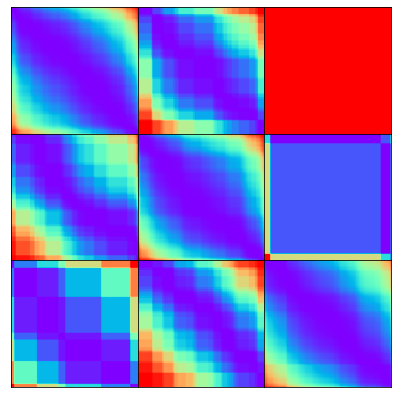

In [68]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from pyts.image import GramianAngularField

# Load the GunPoint dataset
X  = serie

# Get the Gramian angular summation fields for all the time series
gaf = GramianAngularField()
X_gaf = gaf.fit_transform(X)

# Plot the 50 Gramian angular fields
fig = plt.figure(figsize=(7,7))

grid = ImageGrid(fig, 111, nrows_ncols=(3, 3), axes_pad=0, share_all=True)
for i, ax in enumerate(grid):
    im = ax.imshow(X_gaf[i], cmap='rainbow', origin='lower', vmin=-1., vmax=1.)
grid[0].get_yaxis().set_ticks([])
grid[0].get_xaxis().set_ticks([])
# plt.colorbar(im, cax=grid.cbar_axes[0])
ax.cax.toggle_label(True)

# fig.suptitle("Gramian angular summation fields ", y=1)

plt.show()
fig.savefig('data/124.jpg')

In [102]:
from PIL import Image
# Opens a image in RGB mode
im = Image.open(r"data/124.jpg")
 
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size
 
# Setting the points for cropped image
left = 68
top = 60
right = 450
bottom = 442
 
# Cropped image of above dimension
# (It will not change original image)
im1 = im.crop((left, top, right, bottom))
 
# Shows the image in image viewer
im1.show()

In [72]:
!pip install cv2

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
You should consider upgrading via the 'C:\darsh\Research Internship\research\Scripts\python.exe -m pip install --upgrade pip' command.
